# NVAE Experiment on CIFAR-10

This notebook implements the training and evaluation pipeline for the Nouveau VAE (NVAE) model on CIFAR-10.

## 1. Google Colab Setup
Mount Drive and clone the repository (Fresh Copy).

In [7]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
import sys
import shutil

# --- CONFIGURATION ---
REPO_PATH = '/content/drive/MyDrive/Generative-Modeling-on-CIFAR-10'
REPO_URL = "https://github.com/konstantine25b/Generative-Modeling-on-CIFAR-10.git"

# 1. Delete repo if it already exists (Ensure fresh code)
if os.path.exists(REPO_PATH):
    print(f"Deleting existing repository at {REPO_PATH}...")
    shutil.rmtree(REPO_PATH)

# 2. Clone repository
os.chdir('/content/drive/MyDrive')
print(f"Cloning repository to {REPO_PATH}...")
!git clone {REPO_URL}

# 3. Enter the repository
os.chdir(REPO_PATH)
print(f"Current working directory: {os.getcwd()}")

# 4. Add source code to Python path
sys.path.append(os.path.join(REPO_PATH, 'src'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Deleting existing repository at /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10...
Cloning repository to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10...
Cloning into 'Generative-Modeling-on-CIFAR-10'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 174 (delta 86), reused 93 (delta 43), pack-reused 33 (from 1)
Receiving objects: 100% (174/174), 214.75 MiB | 16.29 MiB/s, done.
Resolving deltas: 100% (93/93), done.
Updating files: 100% (34/34), done.
Current working directory: /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10


## 2. GitHub Configuration (Optional)
Configure this if you want to push results back to the repo.

In [8]:
# GitHub Configuration & Setup
import os

try:
    # 1. Configure Git
    user_name = "konstantine25b"
    mail = "konstantine25b@gmail.com"

    # --- IMPORTANT: PASTE YOUR TOKEN BELOW ---
    my_token = "YOUR_TOKEN_HERE"

    if my_token == "YOUR_TOKEN_HERE":
        print("⚠️ PLEASE UPDATE 'my_token' in the code cell with your actual GitHub token to enable pushing.")

    repo_url = f"https://{my_token}@github.com/konstantine25b/Generative-Modeling-on-CIFAR-10.git"

    !git config --global user.name "{user_name}"
    !git config --global user.email "{mail}"

    # 2. Set Remote URL
    if os.path.isdir(".git") and my_token != "YOUR_TOKEN_HERE":
        !git remote set-url origin "{repo_url}"
        print("Git configured successfully for pushing.")
    else:
        print("Skipping remote setup (either not a git repo or token not set).")

except Exception as e:
    print(f"Error setting up GitHub: {e}")

⚠️ PLEASE UPDATE 'my_token' in the code cell with your actual GitHub token to enable pushing.
Skipping remote setup (either not a git repo or token not set).


## 3. Install Dependencies

In [9]:
!pip install -r requirements.txt
!pip install wandb -q

import wandb
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


False

## 4. Setup Experiment

In [13]:
import torch
from src.utils.data_loader import get_cifar10_loaders
from src.vae.train import train_vae
from src.vae.sampling import generate_samples, save_sample_grid
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import wandb

# Configuration
config = {
    'epochs': 100,
    'batch_size': 64,
    'lr': 1e-3,
    'hidden_dim': 64,
    'latent_dim': 20,
    'num_scales': 2,
    'warmup_epochs': 5,
    'weight_decay': 3e-4,
    'use_wandb': True, # Set to True if using WandB
    # Save checkpoints OUTSIDE the repo folder to avoid deletion during re-runs
    'model_save_dir': '/content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1',
    'results_dir': 'results/'
}

# Create directories
os.makedirs(config['model_save_dir'], exist_ok=True)
os.makedirs(config['results_dir'], exist_ok=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")
print(f"Checkpoints will be saved to: {config['model_save_dir']}")

Using device: cuda
Checkpoints will be saved to: /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1


## 5. Load Data

In [14]:
train_loader, val_loader, test_loader = get_cifar10_loaders(
    data_dir='./data',
    batch_size=config['batch_size']
)

Data Loaders ready: Train=45000, Val=5000, Test=10000


## 6. Train Model

In [16]:
# Start Training
train_vae(config, train_loader, val_loader, device)

epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
train/beta,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/bpd,████████████▇▇▇▇▇▇▁
train/kl,▆▆▆▆▆▆▆▇▇▇▇▇▇▇████▁
train/loss,████████████▇▇▇▇▇▇▁
train/lr,████▇▇▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▄▄▄▃▃▃▃▃▃▃▂▂▂▂▁▁▁▁
train/recon,████████▇▇▇▇▇▇▇▇▇▇▁
train/step_bpd,▃▄▃▂▄█▂▂▃▂▂▃▃▂▂▄▁▃▃▂▃▂▂▃▃▃▅▁▆▃▂▂▃▃▄▁▂▃▂▁
train/step_kl,▃▃▁▄▁▂▃▃▃▄▃▃▂█▆▃▅▄▄▃▆▅█▅▂▆▆▅▇█▇▆█▆▆▆▇▇█▆
train/step_loss,▃▄▃▄▅▄▃▂▂▆▃▄▃▆▄▃▂▃▃█▅▃▅▃▃▁▁▄▃▄▃▇▁▃▃▄▄▅▂▃
+3,...


Model initialized on cuda
Resuming from checkpoint: /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_75.pth
Resumed training from epoch 75


Epoch 76/100: 100%|██████████| 704/704 [01:40<00:00,  7.03it/s, loss=11447.44, bpd=5.38, beta=1.00]


=== Epoch 76 Summary ===
Train Loss: 9820.9598 | Recon: 8641.0228 | KL: 1179.9371 | BPD: 4.6122


Val Loss:   9731.1962 | Val BPD: 4.5700
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_76.pth


Epoch 77/100: 100%|██████████| 704/704 [01:39<00:00,  7.05it/s, loss=12499.11, bpd=5.87, beta=1.00]


=== Epoch 77 Summary ===
Train Loss: 9808.9694 | Recon: 8623.7480 | KL: 1185.2214 | BPD: 4.6066


Val Loss:   9642.3378 | Val BPD: 4.5283
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9642.3378)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_77.pth


Epoch 78/100: 100%|██████████| 704/704 [01:40<00:00,  7.03it/s, loss=11457.36, bpd=5.38, beta=1.00]


=== Epoch 78 Summary ===
Train Loss: 9805.6417 | Recon: 8620.0710 | KL: 1185.5708 | BPD: 4.6050


Val Loss:   9722.4979 | Val BPD: 4.5660
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_78.pth


Epoch 79/100: 100%|██████████| 704/704 [01:40<00:00,  7.01it/s, loss=10494.12, bpd=4.93, beta=1.00]


=== Epoch 79 Summary ===
Train Loss: 9790.1104 | Recon: 8602.0221 | KL: 1188.0884 | BPD: 4.5977


Val Loss:   9790.3503 | Val BPD: 4.5978
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_79.pth


Epoch 80/100: 100%|██████████| 704/704 [01:39<00:00,  7.07it/s, loss=12997.72, bpd=6.10, beta=1.00]


=== Epoch 80 Summary ===
Train Loss: 9792.1117 | Recon: 8601.0402 | KL: 1191.0715 | BPD: 4.5986


Val Loss:   9738.5934 | Val BPD: 4.5735
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_80.pth


Epoch 81/100: 100%|██████████| 704/704 [01:39<00:00,  7.06it/s, loss=10014.24, bpd=4.70, beta=1.00]


=== Epoch 81 Summary ===
Train Loss: 9778.5158 | Recon: 8584.3648 | KL: 1194.1510 | BPD: 4.5923


Val Loss:   9718.8929 | Val BPD: 4.5643
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_81.pth


Epoch 82/100: 100%|██████████| 704/704 [01:39<00:00,  7.09it/s, loss=17193.87, bpd=8.07, beta=1.00]


=== Epoch 82 Summary ===
Train Loss: 9781.0533 | Recon: 8584.0958 | KL: 1196.9575 | BPD: 4.5934


Val Loss:   9660.0397 | Val BPD: 4.5366
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_82.pth


Epoch 83/100: 100%|██████████| 704/704 [01:39<00:00,  7.04it/s, loss=14174.08, bpd=6.66, beta=1.00]


=== Epoch 83 Summary ===
Train Loss: 9748.4984 | Recon: 8544.1812 | KL: 1204.3171 | BPD: 4.5782


Val Loss:   9619.0110 | Val BPD: 4.5174
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9619.0110)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_83.pth


Epoch 84/100: 100%|██████████| 704/704 [01:40<00:00,  7.04it/s, loss=15013.09, bpd=7.05, beta=1.00]


=== Epoch 84 Summary ===
Train Loss: 9756.9953 | Recon: 8553.3897 | KL: 1203.6056 | BPD: 4.5822


Val Loss:   9733.3194 | Val BPD: 4.5710
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_84.pth


Epoch 85/100: 100%|██████████| 704/704 [01:39<00:00,  7.05it/s, loss=11248.96, bpd=5.28, beta=1.00]


=== Epoch 85 Summary ===
Train Loss: 9741.4024 | Recon: 8536.0025 | KL: 1205.3999 | BPD: 4.5748


Val Loss:   9635.9622 | Val BPD: 4.5253
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_85.pth


Epoch 86/100: 100%|██████████| 704/704 [01:40<00:00,  7.02it/s, loss=17899.41, bpd=8.41, beta=1.00]


=== Epoch 86 Summary ===
Train Loss: 9745.4012 | Recon: 8535.7503 | KL: 1209.6509 | BPD: 4.5767


Val Loss:   9621.9246 | Val BPD: 4.5187
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_86.pth


Epoch 87/100: 100%|██████████| 704/704 [01:39<00:00,  7.08it/s, loss=11352.03, bpd=5.33, beta=1.00]


=== Epoch 87 Summary ===
Train Loss: 9723.5813 | Recon: 8509.3289 | KL: 1214.2525 | BPD: 4.5665


Val Loss:   9652.3280 | Val BPD: 4.5330
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_87.pth


Epoch 88/100: 100%|██████████| 704/704 [01:41<00:00,  6.97it/s, loss=11506.57, bpd=5.40, beta=1.00]


=== Epoch 88 Summary ===
Train Loss: 9716.7704 | Recon: 8500.3334 | KL: 1216.4370 | BPD: 4.5633


Val Loss:   9586.4832 | Val BPD: 4.5021
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9586.4832)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_88.pth


Epoch 89/100: 100%|██████████| 704/704 [01:41<00:00,  6.96it/s, loss=11671.29, bpd=5.48, beta=1.00]


=== Epoch 89 Summary ===
Train Loss: 9718.7639 | Recon: 8501.7445 | KL: 1217.0193 | BPD: 4.5642


Val Loss:   9703.4803 | Val BPD: 4.5570
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_89.pth


Epoch 90/100: 100%|██████████| 704/704 [01:40<00:00,  7.02it/s, loss=12130.50, bpd=5.70, beta=1.00]


=== Epoch 90 Summary ===
Train Loss: 9710.6540 | Recon: 8492.2674 | KL: 1218.3866 | BPD: 4.5604


Val Loss:   9567.7199 | Val BPD: 4.4933
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9567.7199)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_90.pth


Epoch 91/100: 100%|██████████| 704/704 [01:40<00:00,  6.98it/s, loss=12465.77, bpd=5.85, beta=1.00]


=== Epoch 91 Summary ===
Train Loss: 9698.8016 | Recon: 8475.5184 | KL: 1223.2831 | BPD: 4.5548


Val Loss:   9566.0552 | Val BPD: 4.4925
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9566.0552)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_91.pth


Epoch 92/100: 100%|██████████| 704/704 [01:40<00:00,  6.99it/s, loss=11657.22, bpd=5.47, beta=1.00]


=== Epoch 92 Summary ===
Train Loss: 9684.2833 | Recon: 8457.1715 | KL: 1227.1118 | BPD: 4.5480


Val Loss:   9632.9017 | Val BPD: 4.5239
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_92.pth


Epoch 93/100: 100%|██████████| 704/704 [01:40<00:00,  7.00it/s, loss=13315.30, bpd=6.25, beta=1.00]


=== Epoch 93 Summary ===
Train Loss: 9687.1811 | Recon: 8458.5638 | KL: 1228.6174 | BPD: 4.5494


Val Loss:   9562.8516 | Val BPD: 4.4910
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9562.8516)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_93.pth


Epoch 94/100: 100%|██████████| 704/704 [01:41<00:00,  6.95it/s, loss=10576.89, bpd=4.97, beta=1.00]


=== Epoch 94 Summary ===
Train Loss: 9676.3538 | Recon: 8445.5353 | KL: 1230.8185 | BPD: 4.5443


Val Loss:   9583.4363 | Val BPD: 4.5006
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_94.pth


Epoch 95/100: 100%|██████████| 704/704 [01:40<00:00,  6.99it/s, loss=16132.12, bpd=7.58, beta=1.00]



=== Epoch 95 Summary ===
Train Loss: 9677.4494 | Recon: 8444.0164 | KL: 1233.4330 | BPD: 4.5448
Val Loss:   9639.9267 | Val BPD: 4.5272
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_95.pth


Epoch 96/100: 100%|██████████| 704/704 [01:40<00:00,  6.98it/s, loss=11013.33, bpd=5.17, beta=1.00]


=== Epoch 96 Summary ===
Train Loss: 9663.3833 | Recon: 8428.3173 | KL: 1235.0661 | BPD: 4.5382


Val Loss:   9563.3963 | Val BPD: 4.4912
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_96.pth


Epoch 97/100: 100%|██████████| 704/704 [01:40<00:00,  7.00it/s, loss=13733.62, bpd=6.45, beta=1.00]


=== Epoch 97 Summary ===
Train Loss: 9666.9654 | Recon: 8430.8828 | KL: 1236.0826 | BPD: 4.5399


Val Loss:   9561.5968 | Val BPD: 4.4904
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9561.5968)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_97.pth


Epoch 98/100: 100%|██████████| 704/704 [01:40<00:00,  7.01it/s, loss=13660.56, bpd=6.42, beta=1.00]


=== Epoch 98 Summary ===
Train Loss: 9661.3453 | Recon: 8423.5740 | KL: 1237.7713 | BPD: 4.5372


Val Loss:   9566.7768 | Val BPD: 4.4928
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_98.pth


Epoch 99/100: 100%|██████████| 704/704 [01:40<00:00,  7.04it/s, loss=11251.47, bpd=5.28, beta=1.00]


=== Epoch 99 Summary ===
Train Loss: 9648.0039 | Recon: 8406.1747 | KL: 1241.8292 | BPD: 4.5310


Val Loss:   9582.2591 | Val BPD: 4.5001
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_99.pth


Epoch 100/100: 100%|██████████| 704/704 [01:40<00:00,  7.02it/s, loss=12793.42, bpd=6.01, beta=1.00]


=== Epoch 100 Summary ===
Train Loss: 9646.5462 | Recon: 8404.1003 | KL: 1242.4459 | BPD: 4.5303


Val Loss:   9553.6008 | Val BPD: 4.4866
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9553.6008)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_100.pth


## 7. Final Evaluation on Test Set

In [17]:
from src.vae.train import evaluate, evaluate_with_importance_sampling
from src.vae.model import NVAE

# 1. Load the best model
best_model = NVAE(
    hidden_dim=config['hidden_dim'],
    latent_dim=config['latent_dim'],
    num_scales=config['num_scales']
).to(device)

best_model_path = os.path.join(config['model_save_dir'], 'nvae_best.pth')
best_model.load_state_dict(torch.load(best_model_path))
print(f"Loaded best model from {best_model_path}")

# 2. Standard Evaluation (ELBO)
test_loss, test_bpd = evaluate(best_model, test_loader, device)
print(f"Standard Test Set Results (ELBO) -> Loss: {test_loss:.4f} | BPD: {test_bpd:.4f}")

# 3. Importance Weighted Evaluation (Tighter Bound, Slower)
# k=100 provides a good balance between speed and accuracy for debugging
# Paper uses k=1000
iw_loss, iw_bpd = evaluate_with_importance_sampling(best_model, test_loader, device, k=100)
print(f"Importance Weighted Results (k=100) -> Loss: {iw_loss:.4f} | BPD: {iw_bpd:.4f}")

# 4. Log to WandB
if wandb.run is not None:
    wandb.log({
        "test/final_loss": test_loss,
        "test/final_bpd": test_bpd,
        "test/iwelbo_loss": iw_loss,
        "test/iwelbo_bpd": iw_bpd
    })
    print("Logged test results to WandB.")

Loaded best model from /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth
Standard Test Set Results (ELBO) -> Loss: 9524.6044 | BPD: 4.4730
Starting Importance Weighted Evaluation (k=100)...


IWELBO Eval: 100%|██████████| 157/157 [11:37<00:00,  4.44s/it]

Importance Weighted Results (k=100) -> Loss: 9420.2264 | BPD: 4.4240
Logged test results to WandB.


## 8. Generate Samples & Log to WandB

Loaded best model.


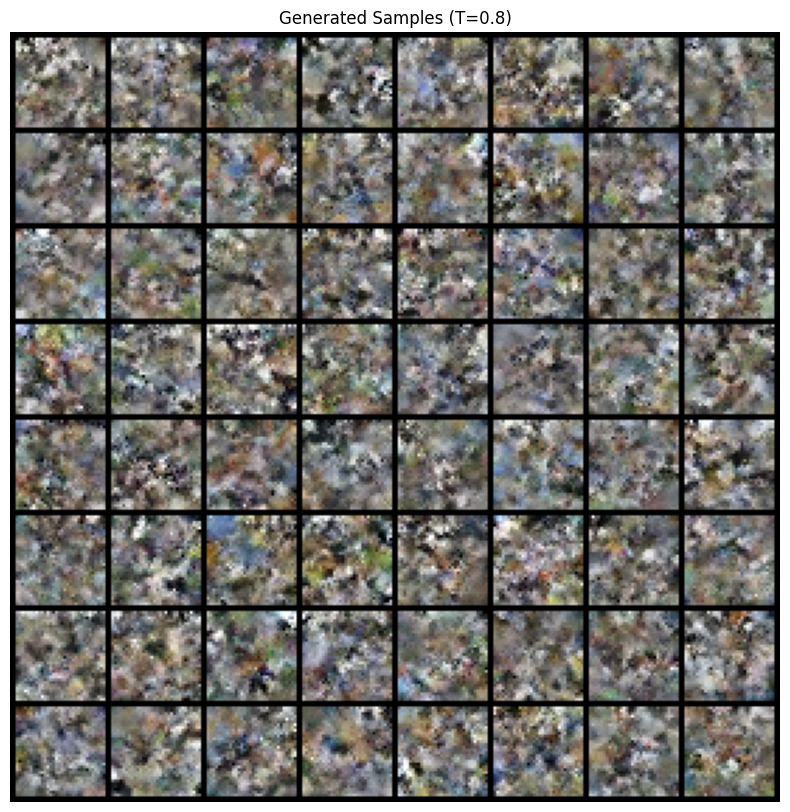

Logged final samples to WandB.


In [18]:
# Load best model (automatically saved during training)
from src.vae.model import NVAE
import torchvision.utils as vutils

model = NVAE(
    hidden_dim=config['hidden_dim'],
    latent_dim=config['latent_dim'],
    num_scales=config['num_scales']
).to(device)

model.load_state_dict(torch.load(os.path.join(config['model_save_dir'], 'nvae_best.pth')))
print("Loaded best model.")

# Generate
samples = generate_samples(model, num_samples=64, temperature=0.8, device=device)

# Visualize locally
plt.figure(figsize=(10, 10))
grid_img = vutils.make_grid(samples, nrow=8, normalize=True)
plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.title("Generated Samples (T=0.8)")
plt.show()

# Log to WandB if active
if wandb.run is not None:
    wandb.log({
        "final_evaluation/generated_samples_grid": [wandb.Image(grid_img, caption="Final Generated Samples (T=0.8)")]
    })
    print("Logged final samples to WandB.")